# Task 3:- Iris Flowers Classification using different classification algorithms.

# Step 1:- Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 2:- Load the dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step 3:- Descriptions of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Step 4:- Data cleaning

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Step 5:- Exploratory Data Analysis

# 1. Histogram

<Axes: >

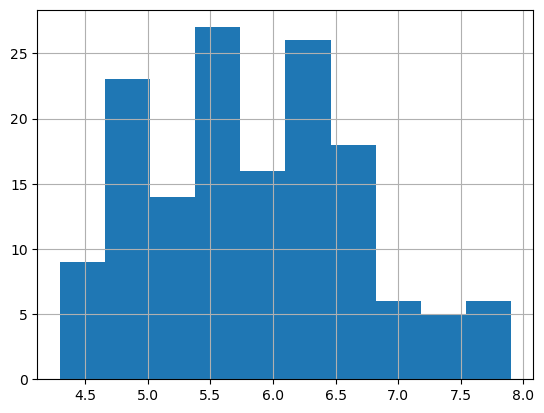

In [8]:
#plot for sepallength
df['SepalLengthCm'].hist()

<Axes: >

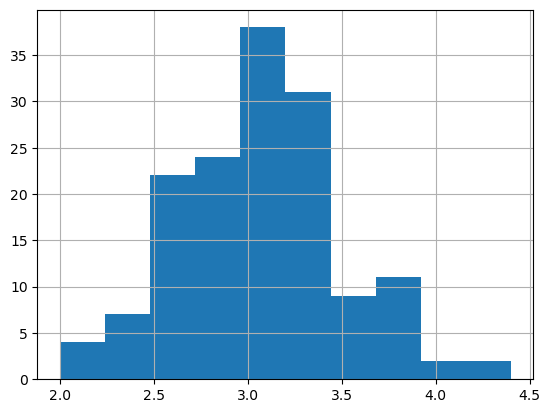

In [9]:
#plot for sepalwidth
df['SepalWidthCm'].hist()

<Axes: >

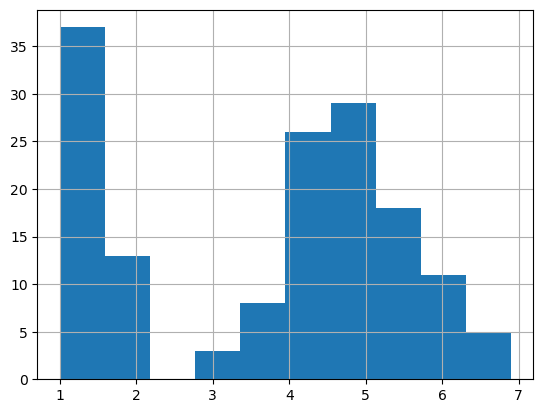

In [10]:
#plot for petallength
df['PetalLengthCm'].hist()

<Axes: >

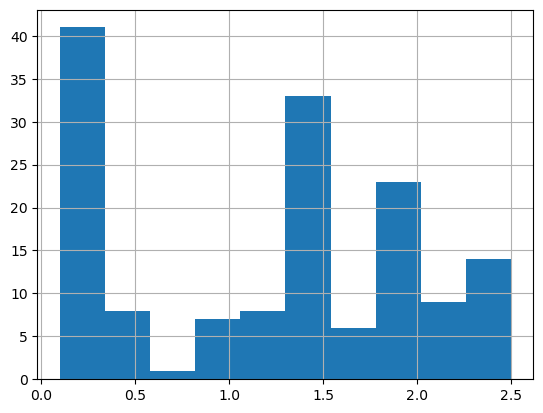

In [11]:
#plot for petalwidth
df['PetalWidthCm'].hist()

# 2. Scatterplot

In [12]:
#defining colors of scatterplot
colors = ['red', 'green', 'blue']
species = [ 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

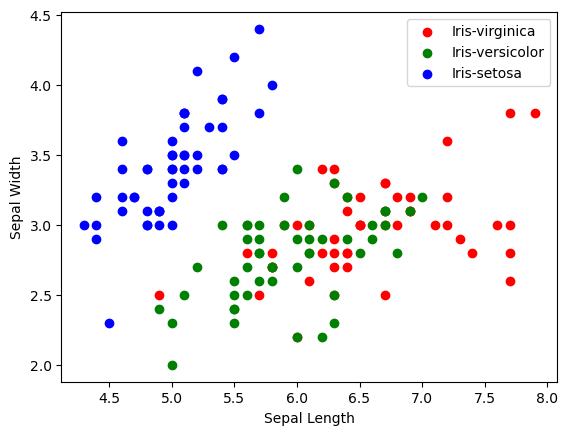

In [13]:
#iterate through 3 species of flowers
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

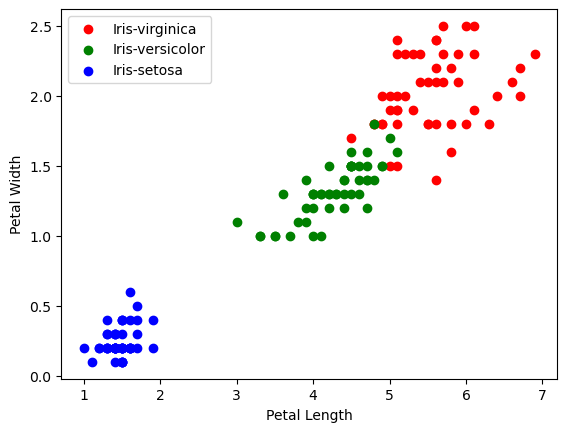

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

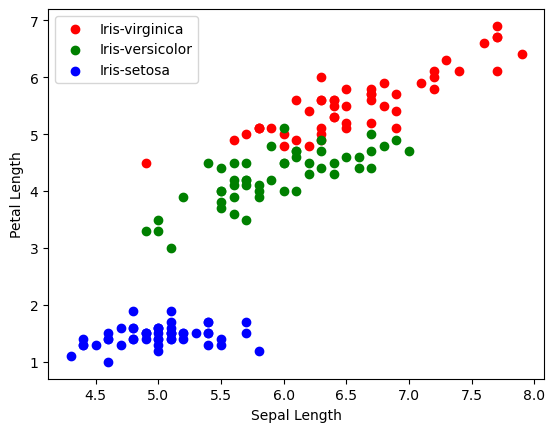

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

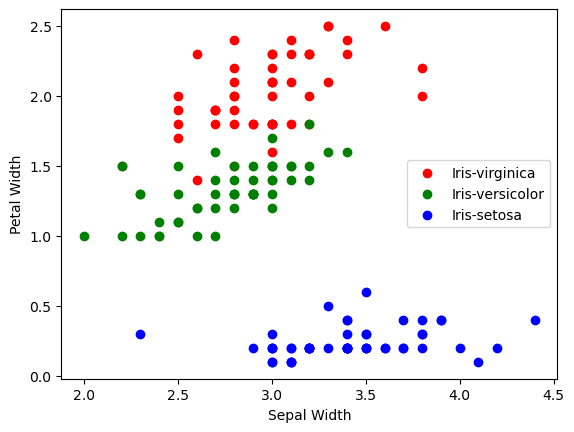

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Step 6:- Correlation Matrix

C:\Users\manish singh\AppData\Local\Temp\ipykernel_5644\4035494933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

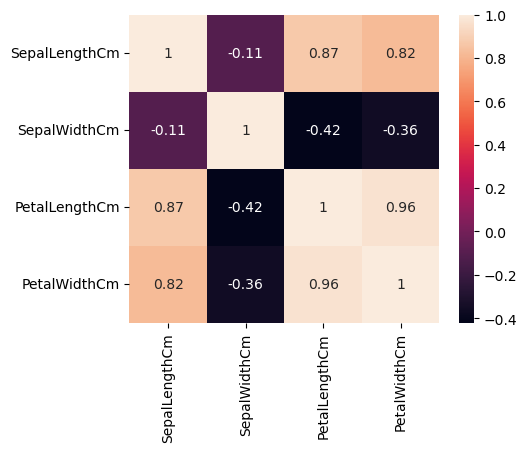

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax)

# Step 7:- Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [19]:
df['Species'] = lab_enc.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Step 8:- Training of Model

In [20]:
from sklearn.model_selection import train_test_split
#training data = 70%
#testing data = 30%

X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

# 1. Training with Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
#model training
model.fit(x_train, y_train)

C:\Users\manish singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
#print accuracy to get model's performance in percentage
print("Accuracy: ", model.score(x_test, y_test)* 100)

Accuracy:  93.33333333333333


# 2. Training with K - Neighbor Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
#model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
#print accuracy to get model's performance in percentage
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


# 3. Training with Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [30]:
#model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
#print accuracy to get model's performance in percentage
print("Accuracy: ", model.score(x_test, y_test)* 100)

Accuracy:  93.33333333333333
